In [1]:
import minna_functions as mf

In [2]:
import pandas as pd

In [3]:
import sqlite3
conn = sqlite3.connect('spotify.db')
c = conn.cursor()

Connect to Database:

In [5]:
get_playlist = mf.get_spotify_playlist('BQC3VHoRN5SpumhRPugWcnIGlWaP7kMxK0xAy2kVsnASwTWIVQ2WhY_-_8EImVwmFAJ2sC7VRUlEEW9lX0icHPFf5wkeBOqXMZk-xC3Zr1zbSn6WeiGUsK87g40iJg-xF0KRHzIey2D89mdVLak')

Retrieve data for every playlist we want to look at and put it into SQL table:

In [5]:
#pop hits data
get_playlist.get_playlist_SQL('37i9dQZF1DX92MLsP3K1fI', 'pop_hits') 
get_playlist.get_playlist_SQL('5TDtuKDbOhrfW7C58XnriZ', 'pop_hits')
get_playlist.get_playlist_SQL('37i9dQZF1DXcBWIGoYBM5M', 'pop_hits')
get_playlist.get_playlist_SQL('37i9dQZF1DWUa8ZRTfalHk', 'pop_hits')

In [6]:
#rap data
get_playlist.get_playlist_SQL('37i9dQZF1DX0XUsuxWHRQd', 'rap_hits') #rap caviar
get_playlist.get_playlist_SQL('5KR0bQIR4BqsgBzV2N54wm', 'rap_hits') #top hip hop
get_playlist.get_playlist_SQL('2G2zkK3cBVXB1jSsDMQSk3', 'rap_hits') # top rap hits 2019
get_playlist.get_playlist_SQL('37i9dQZF1DX2RxBh64BHjQ', 'rap_hits') #most necessary
get_playlist.get_playlist_SQL('37i9dQZF1DWUFmyho2wkQU', 'rap_hits') #hip hop drive

In [7]:
#country data
get_playlist.get_playlist_SQL('37i9dQZF1DX1lVhptIYRda', 'country_hits') #hot country
get_playlist.get_playlist_SQL('37i9dQZF1DX8S0uQvJ4gaa', 'country_hits') #new boots
get_playlist.get_playlist_SQL('37i9dQZF1DX5mB2C8gBeUM', 'country_hits') #wild country
get_playlist.get_playlist_SQL('37i9dQZF1DWYnwbYQ5HnZU', 'country_hits') #country gold

In [8]:
#jazz data 
get_playlist.get_playlist_SQL('37i9dQZF1DXbITWG1ZJKYt', 'jazz_hits') #jazz classics
get_playlist.get_playlist_SQL('37i9dQZF1DX0SM0LYsmbMT', 'jazz_hits') #jazz vibes
get_playlist.get_playlist_SQL('0pYnghexkCjipMVbXSiyOb', 'jazz_hits') #Top Jazz hits

Convert SQL database to a pandas dataframe:

In [6]:
df_pop = get_playlist.SQL_to_dataframe('pop_hits')
df_rap = get_playlist.SQL_to_dataframe('rap_hits')
df_country = get_playlist.SQL_to_dataframe('country_hits')
df_jazz = get_playlist.SQL_to_dataframe('jazz_hits')

Retrive audio feature information from each song in the playlist: 

In [7]:
df_pop = get_playlist.song_audio_features(df_pop, 'pop_hits')
df_rap = get_playlist.song_audio_features(df_rap, 'rap_hits')
df_country = get_playlist.song_audio_features(df_country, 'country_hits')
df_jazz = get_playlist.song_audio_features(df_jazz, 'jazz_hits')

None
None
None
None


Make a new column for our genres:

In [8]:
df_pop['genre'] = 'pop'
df_rap['genre'] = 'rap'
df_country['genre'] = 'country'
df_jazz['genre'] = 'jazz'

combine all data frames:

In [9]:
frames = [df_pop, df_rap, df_country, df_jazz]
total_df = pd.concat(frames)
total_df.describe()

,popularity,speechiness,danceability,energy,liveness,valence
count,973.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,57.578623,0.101065,0.655588,0.595772,0.162916,0.467617
std,20.879215,0.102862,0.149755,0.215789,0.116897,0.222776
min,0.000000,0.025100,0.163000,0.017200,0.021500,0.048100
25%,49.000000,0.038100,0.554000,0.453750,0.095100,0.292000
50%,58.000000,0.053350,0.661500,0.637500,0.117000,0.463000
75%,73.000000,0.126250,0.755000,0.758500,0.178500,0.637500
max,100.000000,0.501000,0.936000,0.966000,0.795000,0.963000


Analyze the data:

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()
%matplotlib inline

# (1) Does speechiness have an effect on popularity?

Text(0.5, 1.0, 'top pop songs valence vs. popularity')

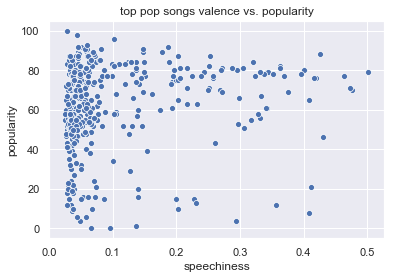

In [27]:
ax = sns.scatterplot(x=total_df["speechiness"], y=total_df["popularity"], data = total_df)
plt.title('top pop songs valence vs. popularity')

In [28]:
model1 = ols('popularity~ speechiness', total_df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     8.252
Date:                Mon, 15 Jul 2019   Prob (F-statistic):            0.00429
Time:                        11:47:32   Log-Likelihood:                -1821.3
No. Observations:                 408   AIC:                             3647.
Df Residuals:                     406   BIC:                             3655.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      58.0606      1.463     39.691      0.000      55.185      60.936
speechiness    29.1574     10.150      2.873      0.004       9.204      49.111
==============================================================================
Omnibus:                       48.342   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.169
Skew:                          -0.912   Prob(JB):                     3.16e-14
Kurtosis:                       3.573   Cond. No.                         9.83
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The r^2 value for popularity and speechiness for all genres is 0.02... leading us to conclude that there is no real significance between speechiness and popularity

# (2) How does speechiness affect a song's popularity within a certain genre?

In [13]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm

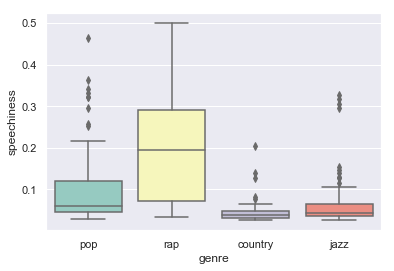

In [26]:
boxplot = sns.boxplot(x="genre", y="speechiness", data=total_df, palette="Set3")

In [33]:
model2 = ols('popularity~ speechiness * C(genre)', total_df).fit()
print(f"Overall model F({model2.df_model: .0f},{model2.df_resid: .0f}) = {model2.fvalue: .3f}, p = {model2.f_pvalue: .4f}")
model2.summary()

Overall model F( 7, 400) =  21.141, p =  0.0000


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     21.14
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.10e-24
Time:                        11:50:11   Log-Likelihood:                -1761.2
No. Observations:                 408   AIC:                             3538.
Df Residuals:                     400   BIC:                             3571.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       53.3247      3.881     13.740      0.000      45.695      60.954
C(genre)[T.jazz]                -9.2406      4.736     -1.951      0.052     -18.551       0.070
C(genre)[T.pop]                 22.2440      4.740      4.693      0.000      12.925      31.563
C(genre)[T.rap]                 10.7332      5.124      2.095      0.037       0.659      20.807
speechiness                     90.3535     77.338      1.168      0.243     -61.686     242.393
speechiness:C(genre)[T.jazz]   -57.3311     83.592     -0.686      0.493    -221.665     107.003
speechiness:C(genre)[T.pop]    -82.4243     80.150     -1.028      0.304    -239.992      75.144
speechiness:C(genre)[T.rap]    -89.7597     78.608     -1.142      0.254    -244.297      64.777
==============================================================================
Omnibus:                      131.162   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              293.311
Skew:                          -1.681   Prob(JB):                     2.03e-64
Kurtosis:                       5.438   Cond. No.                         190.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
anova_table = sm.stats.anova_lm(model2, type= 2)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(genre),3.0,48765.360294,16255.120098,48.582124,8.054247e-27
speechiness,1.0,187.621038,187.621038,0.560748,4.543958e-01
Residual,403.0,134839.996609,334.590562,NaN,NaN
